# Project: Data Wrangling from Twitter Api

## Table of content 
#### 1) Introduction
#### 2) Data Gathering
#### 3) Data Assessing
#### 4) Data Cleaning
#### 4) Exploratory Data Analysis 
#### 5) Conclusion 
#### 6) Results

## Intorduction 

Real-world data rarely comes clean. Using Python and its libraries, you will gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it. This is called data wrangling. You will document your wrangling efforts in a Jupyter Notebook, plus showcase them through analyses and visualizations using Python (and its libraries) and/or SQL.

The dataset that you will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.
Software used:
-pandas
-NumPy
-requests
-tweepy
-json

## Data Gathering

In [1]:
import os
import json
import csv
import numpy as np
import requests
import pandas as pd
import tweepy
import matplotlib.pyplot as plt 
import seaborn as sns

import nltk
from bs4 import BeautifulSoup
import string 
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer 
from nltk.stem import WordNetLemmatizer 
from nltk.stem.porter import PorterStemmer 

In [2]:
twitter_df_original = pd.read_csv("twitter-archive-enhanced-2.csv")
twitter_df_original.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [3]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
get_url = requests.get(url)
with open("image_predictions.tsv", mode = "wb") as pic:
    pic.write(get_url.content)

In [4]:
df_img_original= pd.read_csv("image_predictions.tsv", sep= '\t',encoding = 'utf-8')
df_img_original.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


This example will download your home timeline tweets and print each one of their texts to the console

In [5]:

consumer_key = 'YmoHyUvGh2MmJAIzEQLi8fKPG'
consumer_secret = 'PoKdXLkBiqJ2QTStQsOYGCAbAVeYb8XARi5fWwYUf8mf57MvDU'
access_token = '1272184813064052737-XhyrIv12OZVwHIgdZBiUZhpKNdhFvY'
access_secret = 'v8nXeWrT1umgaYZeuh8MBeMXDEN3VmvsXDdqoiQtp2IPl'

import tweepy
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth)
public_tweets = api.home_timeline()
for tweet in public_tweets:
    print(tweet.text)


चीन विवाद के बीच सियासत में उलझीं पार्टियां!
देखिए #Dangal, @sardanarohit के साथ
पूरा कार्यक्रम:… https://t.co/LkWsyZab9V
In the name of science, @NASA_Marshall engineers will try to break a structural test article of a liquid oxygen tan… https://t.co/S77Exz9Rjq
जेपी नड्डा ने कहा कि नरेंद्र मोदी ही 'Surender Modi' हैं यानी वो नरों के ही नेता नहीं अब सुरों (देवताओं) के भी नेता… https://t.co/VUe7n9p0YG
Kabhi kabhi khaane ko itna kuch hota hai acha aur garam, lekin jab tak achi movie ya show nai milta wo khana thanda ho jaata hai
देखिए सदी के सबसे बड़े सूर्यग्रहण की तस्वीरें!
@JournoAshutosh, @AnkurWadhawan, @mewatisanjoo और @SwetaSinghAT की… https://t.co/n0SqkDcAoS
भारत और चीन बातचीत के रास्ते दोनों देशों के बीच बने तनाव को कम करने की कोशिश में है
#RE
https://t.co/6JosKbct0f
Never give up, always focused on the next step...All together 💪🏼 #finoallafine https://t.co/uBITkFZaar
पुलिस ने आरोपियों के कब्जे से 5 करोड़ रुपये कीमत की 50 लग्जरी गाड़ियां बरामद की हैं
(@neelanshu512,… https://t.co

Checking the Authentication OF ACCOUNT 

In [6]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
try:
    api.verify_credentials()
    print("Authentication OK")
except:
    print("Error during authentication")

Authentication OK


In [7]:
#took help from git hub profiles 
#https://medium.com/ub-women-data-scholars/we-rate-dogs-twitter-data-analysis-672e1a8903b4
temp_file_name = 'tweet_json.txt'
if not os.path.isfile(temp_file_name):
    with open(os.path.join(os.getcwd(), temp_file_name), mode = 'a+') as file:
        for tweet_id in tweets:
            try:
                tweet = api.get_status(tweet_id, tweet_mode = 'extended')
                twt_sjson = json.dumps(tweet._json)
                file.write(twt_sjson + '\n')
            except:
                deleted_tweets.append(tweet_id)
            start = time.time()
            end = time.time()
            print(end - start)
            
with open('tweet_json.txt') as file:
    df_list = []
    for line in file:
        df_list.append(json.loads(line))
        



In [8]:
api_1 = []
for name in df_list:
    retweets = name['retweet_count']
    tweet_id = name['id']
    favs = name['favorite_count']
    api_1.append({'retweet_count': retweets,
                    'tweet_id': tweet_id,
                    'favorite_count': favs,
                 "display_text_range": name["display_text_range"] })
API_df_original = pd.DataFrame(api_1, columns = ['retweet_count', 'tweet_id', 'favorite_count','display_text_range'])

In [9]:
API_df_original.head()

,retweet_count,tweet_id,favorite_count,display_text_range
0,7918,892420643555336193,37073,"[0, 85]"
1,5885,892177421306343426,31910,"[0, 138]"
2,3885,891815181378084864,24010,"[0, 121]"
3,8074,891689557279858688,40397,"[0, 79]"
4,8753,891327558926688256,38614,"[0, 138]"


In [10]:
twitter_df =  twitter_df_original.copy()
df_img = df_img_original.copy()
API_df =API_df_original.copy()

Now we have all the data frames .

In [11]:
twitter_df= twitter_df.sort_values('tweet_id')
twitter_df.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [12]:
df_img = df_img.sort_values('tweet_id')
df_img.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


In [13]:
API_df= API_df.sort_values('tweet_id')

In [14]:
API_df.head()

,retweet_count,tweet_id,favorite_count,display_text_range
2331,479,666020888022790149,2477,"[0, 131]"
2330,45,666029285002620928,123,"[0, 139]"
2329,43,666033412701032449,119,"[0, 130]"
2328,135,666044226329800704,280,"[0, 137]"
2327,41,666049248165822465,101,"[0, 120]"


## Data Assessing


 First I will assess twitter data frame 

In [15]:
twitter_df.shape

(2356, 17)

In [16]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 2355 to 0
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [17]:
twitter_df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

There are too many null values.

In [18]:
twitter_df.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [19]:
twitter_df.tweet_id.nunique()
#All the tweet ids are unique

2356

In [20]:
twitter_df.duplicated().sum()

0

In [21]:
twitter_df.shape

(2356, 17)

Assessing Image dataframe 

*tweet_id is the last part of the tweet URL

*p1 is the algorithm's #1 prediction for the image in the tweet → golden retriever

*p1_conf is how confident the algorithm is in its #1 prediction → 95%

*p1_dog is whether or not the #1 prediction is a breed of dog → TRUE

*p2 is the algorithm's second most likely prediction → Labrador retriever

*p2_conf is how confident the algorithm is in its #2 prediction → 1%

*p2_dog is whether or not the #2 prediction is a breed of dog → TRUE

In [22]:
df_img.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


In [23]:
df_img.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [24]:
df_img.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 168.2+ KB


In [25]:
df_img.dtypes

tweet_id      int64
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

In [26]:
df_img.shape

(2075, 12)

Now atlast assessing the api dataframe

In [27]:
API_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2332 entries, 2331 to 0
Data columns (total 4 columns):
retweet_count         2332 non-null int64
tweet_id              2332 non-null int64
favorite_count        2332 non-null int64
display_text_range    2332 non-null object
dtypes: int64(3), object(1)
memory usage: 91.1+ KB


In [28]:
API_df.dtypes

retweet_count          int64
tweet_id               int64
favorite_count         int64
display_text_range    object
dtype: object

In [29]:
API_df.shape

(2332, 4)

## Data Cleaning 

### Define
a) drop 'in_reply_to_status_id', 'in_reply_to_user_id, 'expanded_urls'

b) change the timestamp data type

c) change the tweet_id data type of all the dataset 

d) changing the rating data types

e)Ratings are very inaccurate

f) choose the tweet which is not retweet

g) replace invalid names with None

h) Keeping rows with p1_dog, p2_dog, or p3_dog = True. 


#### Define


a) drop 'in_reply_to_status_id', 'in_reply_to_user_id, 'expanded_urls'


#### Code

In [30]:
twitter_df.drop(['source'], axis=1,inplace=True)

In [31]:
twitter_df.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis=1, inplace=True)


In [32]:
twitter_df.drop(['expanded_urls'], axis=1,inplace=True)

#### Test

In [33]:
twitter_df.head(1)

,tweet_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2355,666020888022790149,2015-11-15 22:32:08 +0000,Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,8,10,None,None,None,None,None


#### Define

b) change the timestamp data type


#### Code 

In [34]:
twitter_df['timestamp'] = pd.to_datetime(twitter_df['timestamp'] )

#### Test

In [35]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 2355 to 0
Data columns (total 13 columns):
tweet_id                      2356 non-null int64
timestamp                     2356 non-null datetime64[ns, UTC]
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns, UTC](1), float64(2), int64(3), object(7)
memory usage: 257.7+ KB


#### Define

c) change the tweet_id data type


#### Code

In [36]:
twitter_df['tweet_id'] = twitter_df['tweet_id'].astype('str')


In [37]:
df_img['tweet_id'] = df_img['tweet_id'].astype('str')


In [38]:
API_df['tweet_id'] = API_df['tweet_id'].astype('str')


#### Test

In [39]:
twitter_df.info

<bound method DataFrame.info of                 tweet_id                 timestamp  \
2355  666020888022790149 2015-11-15 22:32:08+00:00   
2354  666029285002620928 2015-11-15 23:05:30+00:00   
2353  666033412701032449 2015-11-15 23:21:54+00:00   
2352  666044226329800704 2015-11-16 00:04:52+00:00   
2351  666049248165822465 2015-11-16 00:24:50+00:00   
...                  ...                       ...   
4     891327558926688256 2017-07-29 16:00:24+00:00   
3     891689557279858688 2017-07-30 15:58:51+00:00   
2     891815181378084864 2017-07-31 00:18:03+00:00   
1     892177421306343426 2017-08-01 00:17:27+00:00   
0     892420643555336193 2017-08-01 16:23:56+00:00   

                                                   text  retweeted_status_id  \
2355  Here we have a Japanese Irish Setter. Lost eye...                  NaN   
2354  This is a western brown Mitsubishi terrier. Up...                  NaN   
2353  Here is a very happy pup. Big fan of well-main...                  NaN   

In [40]:
df_img.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 168.2+ KB


In [41]:
API_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2332 entries, 2331 to 0
Data columns (total 4 columns):
retweet_count         2332 non-null int64
tweet_id              2332 non-null object
favorite_count        2332 non-null int64
display_text_range    2332 non-null object
dtypes: int64(2), object(2)
memory usage: 91.1+ KB


#### Define

d) changing the rating data types


#### Code

In [42]:
twitter_df[['rating_numerator', 'rating_denominator']] =twitter_df[['rating_numerator', 'rating_denominator']].astype('double')

#### Test

In [43]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 2355 to 0
Data columns (total 13 columns):
tweet_id                      2356 non-null object
timestamp                     2356 non-null datetime64[ns, UTC]
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
rating_numerator              2356 non-null float64
rating_denominator            2356 non-null float64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns, UTC](1), float64(4), object(8)
memory usage: 257.7+ KB


#### Define

e) Ratings are very inaccurate so I divided rating_numerator to rating_denominator and added a column 


#### Code

In [44]:
twitter_df['actual_rating'] = twitter_df['rating_numerator']/twitter_df['rating_denominator']


#### Test

In [45]:
twitter_df.head(1)

,tweet_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,actual_rating
2355,666020888022790149,2015-11-15 22:32:08+00:00,Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,8.0,10.0,None,None,None,None,None,0.8


#### Define

f) choose the tweet which is not retweet


#### Code

In [46]:
twitter_df = twitter_df[twitter_df['retweeted_status_id'].isnull()]

#### Test

In [47]:
twitter_df.isnull().count()

tweet_id                      2175
timestamp                     2175
text                          2175
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
rating_numerator              2175
rating_denominator            2175
name                          2175
doggo                         2175
floofer                       2175
pupper                        2175
puppo                         2175
actual_rating                 2175
dtype: int64

#### Define

g) replace invalid names with None


#### Code

In [48]:
twitter_df['name'][twitter_df['name'].str.match('/[a-z]+/g')] = None

c:\users\shiwali singh\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\shiwali singh\appdata\local\programs\python\python36\lib\site-packages\pandas\core\generic.py:9116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
c:\users\shiwali singh\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py:3326: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documenta

#### Test

In [49]:
twitter_df.describe()

,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator,actual_rating
count,0.0,0.0,2175.000000,2175.000000,2175.0
mean,NaN,NaN,13.215172,10.492874,inf
std,NaN,NaN,47.725696,7.019084,NaN
min,NaN,NaN,0.000000,0.000000,0.0
25%,NaN,NaN,10.000000,10.000000,1.0
50%,NaN,NaN,11.000000,10.000000,1.1
75%,NaN,NaN,12.000000,10.000000,1.2
max,NaN,NaN,1776.000000,170.000000,inf


#### Define

h) Keeping rows with p1_dog, p2_dog, or p3_dog = True. 


#### Code

In [50]:
df_img.drop(df_img.query("p1_dog == False and p2_dog == False and p3_dog == False").index, inplace = True)

#### Test

In [51]:
df_img.shape

(1751, 12)

### Tidy master dataset

a) Tidy the 4 stages of dog column to create variable

b) Concatenate all datasets to make one clean dataset


#### Define 

a) Tidy the 4 stages of dog column to create variable

#### Code

In [52]:
twitter_new=pd.melt(twitter_df, id_vars =['tweet_id'], value_vars =['doggo','floofer','pupper','puppo']) 
twitter_new.head(1)

,tweet_id,variable,value
0,666020888022790149,doggo,None


In [53]:
twitter_new['tweet_id'] = twitter_df['tweet_id'].astype('str')

In [54]:
twitter_new.drop(['value'], axis=1, inplace=True)


In [55]:
twitter_new=twitter_new.rename(columns={'variable': 'type'})


#### Test

In [56]:
twitter_new.head()

,tweet_id,type
0,892420643555336193,doggo
1,892177421306343426,doggo
2,891815181378084864,doggo
3,891689557279858688,doggo
4,891327558926688256,doggo


In [57]:
twitter_df = pd.merge(how='left', left=twitter_df, right=twitter_new, left_on='tweet_id', right_on='tweet_id')
twitter_df.head(1)

,tweet_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,actual_rating,type
0,666020888022790149,2015-11-15 22:32:08+00:00,Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,8.0,10.0,None,None,None,None,None,0.8,floofer


#### Define

b) Concatenate all datasets to make one clean dataset


#### Code

In [58]:
twitter_df = pd.merge(how='left', left=twitter_df, right=df_img, left_on='tweet_id', right_on='tweet_id')

In [59]:
twitter_df = pd.merge(how='left', left=twitter_df, right=API_df, left_on='tweet_id', right_on='tweet_id')


#### Test

In [60]:
twitter_df.head()

,tweet_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,name,doggo,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,display_text_range
0,666020888022790149,2015-11-15 22:32:08+00:00,Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,8.0,10.0,None,None,...,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,479.0,2477.0,"[0, 131]"
1,666029285002620928,2015-11-15 23:05:30+00:00,This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,7.0,10.0,a,None,...,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,45.0,123.0,"[0, 139]"
2,666033412701032449,2015-11-15 23:21:54+00:00,Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,9.0,10.0,a,None,...,True,malinois,0.138584,True,bloodhound,0.116197,True,43.0,119.0,"[0, 130]"
3,666044226329800704,2015-11-16 00:04:52+00:00,This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,6.0,10.0,a,None,...,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,135.0,280.0,"[0, 137]"
4,666049248165822465,2015-11-16 00:24:50+00:00,Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,5.0,10.0,None,None,...,True,Rottweiler,0.243682,True,Doberman,0.154629,True,41.0,101.0,"[0, 120]"


In [61]:
twitter_df.shape

(2175, 29)

## Exploratory Data Analysis 


#### Q.1 Which dog categories are max amongst all 4?

In [121]:
twitter_df.doggo.replace('None', '', inplace=True)
twitter_df.floofer.replace('None', '', inplace=True)
twitter_df.pupper.replace('None', '', inplace=True)
twitter_df.puppo.replace('None', '', inplace=True)

In [122]:
twitter_df.doggo.replace(np.NaN, '', inplace=True) 
twitter_df.floofer.replace(np.NaN, '', inplace=True) 
twitter_df.pupper.replace(np.NaN, '', inplace=True) 
twitter_df.puppo.replace(np.NaN, '', inplace=True) 

In [123]:
twitter_df.groupby(["doggo", "floofer", "pupper", "puppo"]).size().reset_index().rename(columns={0: "count"})

,doggo,floofer,pupper,puppo,count
0,,,,,1831
1,,,,puppo,24
2,,,pupper,,224
3,,floofer,,,9
4,doggo,,,,75
5,doggo,,,puppo,1
6,doggo,,pupper,,10
7,doggo,floofer,,,1


In [127]:
twitter_df['stage'] = twitter_df.doggo + twitter_df.floofer + twitter_df.pupper + twitter_df.puppo
twitter_df.loc[twitter_df.stage == 'doggopupper', 'stage'] = 'doggo, pupper'
twitter_df.loc[twitter_df.stage == 'doggopuppo', 'stage'] = 'doggo, puppo'
twitter_df.loc[twitter_df.stage == 'doggofloofer', 'stage'] = 'doggo, floofer'


In [135]:
dog_stage_count=twitter_df['stage'].value_counts()


Plotting the values of dogs categories

(-10, 2000)

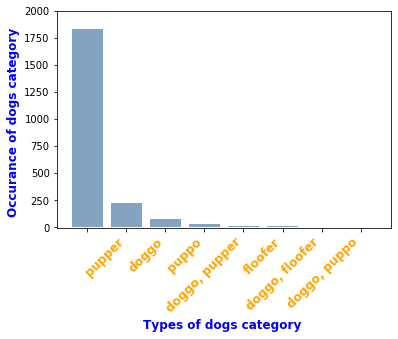

In [139]:

height = dog_stage_count.values
bars = dog_stage_count.index

y_pos = np.arange(len(bars))
plt.bar(y_pos, height, color=(0.2, 0.4, 0.6, 0.6))
 
plt.xticks(y_pos, bars, color='orange', rotation=45, fontweight='bold', fontsize='12', horizontalalignment='right')
plt.tick_params(labelbottom='off')

# Custom Axis title
plt.xlabel('Types of dogs category ', fontweight='bold', color = 'blue', fontsize='12', horizontalalignment='center')
plt.ylabel('Occurance of dogs category ', fontweight='bold', color = 'blue', fontsize='12', horizontalalignment='center')
plt.ylim(-10,2000)

Maximum dogs are classifed in pupper and minimum are in floofer . Total of 16.69% of dogs are classified others are not .

#### Q.2 Max and min rating of dogs .

In [95]:
ratings = twitter_df.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)


In [94]:
twitter_df.rating_numerator = ratings[0]


In [96]:
twitter_df.rating_denominator = ratings[1]


In [97]:
rating_numerator_count =twitter_df['rating_numerator'].value_counts()
rating_numerator_count

12       500
10       442
11       426
13       307
9        156
8         98
7         53
14        43
5         34
6         32
3         19
4         17
2          9
1          8
0          2
420        2
17         1
45         1
1776       1
11.26      1
80         1
666        1
13.5       1
60         1
204        1
84         1
11.27      1
143        1
144        1
9.5        1
007        1
99         1
182        1
960        1
88         1
20         1
9.75       1
15         1
121        1
165        1
50         1
44         1
24         1
Name: rating_numerator, dtype: int64

In [98]:
rating_numerator_count_index = list(rating_numerator_count.index)


Text(0, 0.5, 'Number of times that rating occure ')

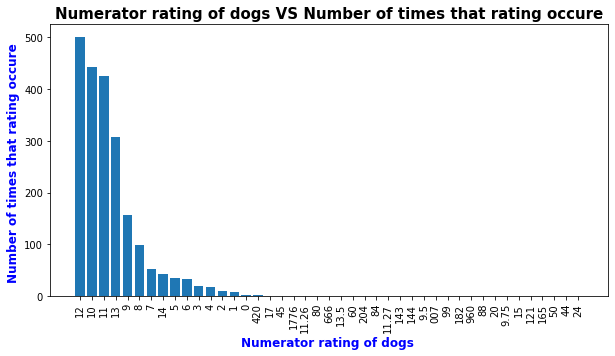

In [140]:
plt.figure(figsize=(10,5))
height = rating_numerator_count.values
bars = rating_numerator_count_index

y_pos = np.arange(len(bars))
plt.bar(y_pos, height)
 
plt.xticks(y_pos, bars, color='black', rotation=90)
plt.tick_params(labelbottom='off')

# Custom Axis title
plt.title('Numerator rating of dogs VS Number of times that rating occure', fontweight='bold', color = 'black', fontsize='15', horizontalalignment='center')
plt.xlabel('Numerator rating of dogs ', fontweight='bold', color = 'blue', fontsize='12', horizontalalignment='center')
plt.ylabel('Number of times that rating occure ', fontweight='bold', color = 'blue', fontsize='12', horizontalalignment='center')


From graph I can conclude that the most number of rating is 12 and the other ratings from 420 to 204 on x axis are singly rated 

In [141]:
rating_denominator_count =twitter_df['rating_denominator'].value_counts()
rating_denominator_count

10     2153
50        3
11        2
80        2
20        2
170       1
120       1
90        1
00        1
2         1
150       1
130       1
110       1
15        1
16        1
40        1
7         1
70        1
Name: rating_denominator, dtype: int64

In [142]:
rating_denominator_count_index = list(rating_denominator_count.index)


(-10, 200)

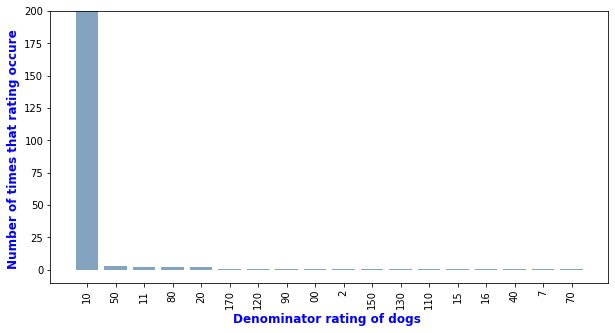

In [143]:
plt.figure(figsize=(10,5))
height = rating_denominator_count.values
bars = rating_denominator_count_index

y_pos = np.arange(len(bars))
plt.bar(y_pos, height, color=(0.2, 0.4, 0.6, 0.6))
 
plt.xticks(y_pos, bars, color='black', rotation=90)
plt.tick_params(labelbottom='off')

# Custom Axis title
plt.xlabel('Denominator rating of dogs ', fontweight='bold', color = 'blue', fontsize='12', horizontalalignment='center')
plt.ylabel('Number of times that rating occure ', fontweight='bold', color = 'blue', fontsize='12', horizontalalignment='center')
plt.ylim(-10,200)

In [144]:
df_neno=twitter_df.query('rating_numerator < rating_denominator')
df_neno_simplified=df_neno[['text', 'rating_denominator', 'rating_numerator']]
pd.set_option('display.max_columns', 500)
df_neno_simplified

,text,rating_denominator,rating_numerator
17,Not familiar with this breed. No tail (weird)....,10,1
20,This is an Albanian 3 1/2 legged Episcopalian...,2,1
94,Never seen dog like this. Breathes heavy. Tilt...,10,1
262,Flamboyant pup here. Probably poisonous. Won't...,10,1
315,After 22 minutes of careful deliberation this ...,10,1
413,The millennials have spoken and we've decided ...,10,1
484,What kind of person sends in a picture without...,10,1
907,After reading the comments I may have overesti...,10,1
1079,"From left to right:\nCletus, Jerome, Alejandro...",50,45
1334,"PUPDATE: can't see any. Even if I could, I cou...",10,0


Many ratings are not clear and few tweets are done from two accounts 

@dog_rates tweet more actively 

#### Q.3 Most frequently used words in the tweets using NLP .

In [145]:
twitter_df['text'][3]


'This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx'

In [146]:
#dividing into diffrent columns with '// '
tweets=twitter_df['text'].str.split("//", n=4, expand=True)
tweets['comments']=tweets[0]
tweets.head()

,0,1,2,comments
0,Here we have a Japanese Irish Setter. Lost eye...,t.co/BLDqew2Ijj,None,Here we have a Japanese Irish Setter. Lost eye...
1,This is a western brown Mitsubishi terrier. Up...,t.co/r7mOb2m0UI,None,This is a western brown Mitsubishi terrier. Up...
2,Here is a very happy pup. Big fan of well-main...,t.co/y671yMhoiR,None,Here is a very happy pup. Big fan of well-main...
3,This is a purebred Piers Morgan. Loves to Netf...,t.co/DWnyCjf2mx,None,This is a purebred Piers Morgan. Loves to Netf...
4,Here we have a 1949 1st generation vulpix. Enj...,t.co/4B7cOc1EDq,None,Here we have a 1949 1st generation vulpix. Enj...


In [147]:
#removing all the html text
def remove_htlm(text):
    soup= BeautifulSoup(text,'lxml')
    html_free=soup.grt_text()
    return html_free

In [148]:
#remoivng punctuations
def remove_punc(text):
    no_punc= "".join([c for c in text if c not in string.punctuation])
    return no_punc

In [149]:
tweets['comments']= tweets['comments'].apply(lambda x : remove_punc(x))
tweets['comments'].all

<bound method Series.all of 0       Here we have a Japanese Irish Setter Lost eye ...
1       This is a western brown Mitsubishi terrier Ups...
2       Here is a very happy pup Big fan of wellmainta...
3       This is a purebred Piers Morgan Loves to Netfl...
4       Here we have a 1949 1st generation vulpix Enjo...
                              ...                        
2170    This is Franklin He would like you to stop cal...
2171    This is Darla She commenced a snooze mid meal ...
2172    This is Archie He is a rare Norwegian Pouncing...
2173    This is Tilly Shes just checking pup on you Ho...
2174    This is Phineas Hes a mystical boy Only ever a...
Name: comments, Length: 2175, dtype: object>

In [150]:
tokenizer = RegexpTokenizer(r'\w+')

In [151]:
tweets['comments'] =tweets['comments'].apply(lambda x: tokenizer.tokenize(x.lower()))
tweets['comments'].head(3)

0    [here, we, have, a, japanese, irish, setter, l...
1    [this, is, a, western, brown, mitsubishi, terr...
2    [here, is, a, very, happy, pup, big, fan, of, ...
Name: comments, dtype: object

In [152]:
#removing stop words 
def remove_sw(text):
    words=[w  for w in text if w not in stopwords.words('english')]
    return words

In [153]:
tweets['comments'] =tweets['comments'].apply(lambda x:remove_sw(x))
tweets['comments'].head(3)

0    [japanese, irish, setter, lost, eye, vietnam, ...
1    [western, brown, mitsubishi, terrier, upset, l...
2    [happy, pup, big, fan, wellmaintained, decks, ...
Name: comments, dtype: object

In [154]:
lemmatizer  = WordNetLemmatizer()

def word_lemma(text):
    lem_text=[lemmatizer.lemmatize(i) for i in text]
    return lem_text

In [155]:
tweets['comments'] =tweets['comments'].apply(lambda x:word_lemma(x))
tweets['comments'].head(3)

0    [japanese, irish, setter, lost, eye, vietnam, ...
1    [western, brown, mitsubishi, terrier, upset, l...
2    [happy, pup, big, fan, wellmaintained, deck, l...
Name: comments, dtype: object

In [156]:
stemmer = PorterStemmer()

def word_stem(text):
    stem_text= " ".join([stemmer.stem(i) for i in text])
    return stem_text

In [157]:
tweets['comments'] =tweets['comments'].apply(lambda x: word_stem(x))
tweets['comments'].head(3)

0    japanes irish setter lost eye vietnam big fan ...
1    western brown mitsubishi terrier upset leaf ac...
2    happi pup big fan wellmaintain deck look tongu...
Name: comments, dtype: object

In [158]:
#using count vectorizer nlp process to count the occurance of words 
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(token_pattern=r"(?u)\b\w+\b")

matrix = vectorizer.fit_transform(tweets['comments'])
matrix

<2175x4963 sparse matrix of type '<class 'numpy.int64'>'
	with 24930 stored elements in Compressed Sparse Row format>

In [159]:
counts = pd.DataFrame(matrix.toarray(),
                      columns=vectorizer.get_feature_names())

counts_wc = counts.sum(axis = 0)

counts_wc_5 = counts_wc.sort_values(ascending=False).head(20)
counts_wc_5.drop(['1210','1110','1010','http','he','would','1310','910'], axis=0, inplace=True)

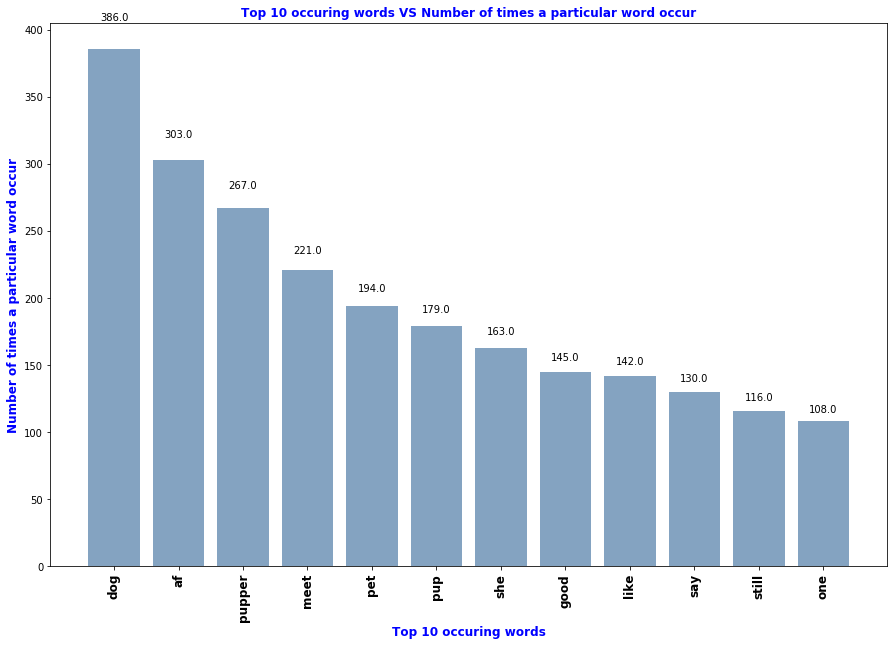

In [160]:
#plotting the word counts
plt.figure(figsize=(15,10))
height = counts_wc_5.values
bars = counts_wc_5.index

y_pos = np.arange(len(bars))
rects1=plt.bar(y_pos, height, color=(0.2, 0.4, 0.6, 0.6))
 
plt.xticks(y_pos, bars, color='black', rotation=90,fontweight='bold',fontsize='12')
plt.tick_params(labelbottom='off')

# Custom Axis title
plt.title('Top 10 occuring words VS Number of times a particular word occur', fontweight='bold', color = 'blue', fontsize='12', horizontalalignment='center')

plt.xlabel('Top 10 occuring words', fontweight='bold', color = 'blue', fontsize='12', horizontalalignment='center')
plt.ylabel('Number of times a particular word occur', fontweight='bold', color = 'blue', fontsize='12', horizontalalignment='center')

def autolabel(rects):
    
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 1.05*height, float(height),ha='center', va='bottom')
autolabel(rects1)

From the above analysis we can say that the most used words are pupper pup meet ect.


In [161]:
twitter_df.drop(['text','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], axis=1, inplace=True)

In [162]:
twitter_df.drop(['timestamp','doggo',"floofer",'pupper','puppo'], axis=1, inplace=True )

Now plotting the actual rating of dogs and then finding the most rated dog 

In [163]:
twitter_df.drop(['rating_numerator','rating_denominator'], axis=1, inplace=True)

In [164]:
actual_rating_count=twitter_df.actual_rating.value_counts().iloc[:10]

Text(0, 0.5, 'Number of times that rating occure ')

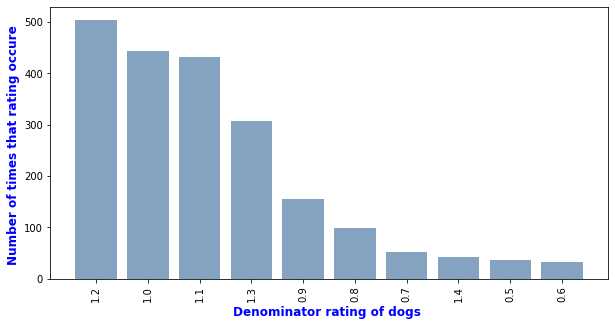

In [165]:
plt.figure(figsize=(10,5))
height = actual_rating_count.values
bars = actual_rating_count.index

y_pos = np.arange(len(bars))
plt.bar(y_pos, height, color=(0.2, 0.4, 0.6, 0.6))
 
plt.xticks(y_pos, bars, color='black', rotation=90)
plt.tick_params(labelbottom='off')

# Custom Axis title
plt.xlabel('Denominator rating of dogs ', fontweight='bold', color = 'blue', fontsize='12', horizontalalignment='center')
plt.ylabel('Number of times that rating occure ', fontweight='bold', color = 'blue', fontsize='12', horizontalalignment='center')


Most number of are rated 1.2 and 1.1 as we can see from the graph 


In [166]:
twitter_df.to_csv('twitter_clean.csv', index = False)

In [167]:
df= pd.read_csv("twitter_clean.csv")
df.head(3)

,tweet_id,name,actual_rating,type,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,display_text_range,stage
0,666020888022790149,None,0.8,floofer,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1.0,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,479.0,2477.0,"[0, 131]",NaN
1,666029285002620928,a,0.7,floofer,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1.0,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,45.0,123.0,"[0, 139]",NaN
2,666033412701032449,a,0.9,floofer,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1.0,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,43.0,119.0,"[0, 130]",NaN


Now we will check that the confidence of first algo must be grster than second and second must be greater than 3rd

In [168]:
df.query('p1_conf < p2_conf')

,tweet_id,name,actual_rating,type,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,display_text_range,stage


In [169]:
df.query('p2_conf<p3_conf')

,tweet_id,name,actual_rating,type,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,display_text_range,stage


In [170]:
df.query('p1_conf<p3_conf')

,tweet_id,name,actual_rating,type,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,display_text_range,stage


All the ratings are correct 

In [171]:
def dog_breed(i):
    if i[0] == True:
        return i[1]
    elif i[2] == True:
        return i[3]
    else:
        return i[4]

df['breed'] = df[['p1_dog','p1','p2_dog','p2','p3']].apply(dog_breed , axis=1)
df.head(1)

,tweet_id,name,actual_rating,type,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,display_text_range,stage,breed
0,666020888022790149,None,0.8,floofer,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1.0,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,479.0,2477.0,"[0, 131]",NaN,Welsh_springer_spaniel


Adding a breed column of possible outcome of breed of a bog accoirding to algorithms confidence

In [172]:
dog_breed_count=df['breed'].value_counts().iloc[:10]

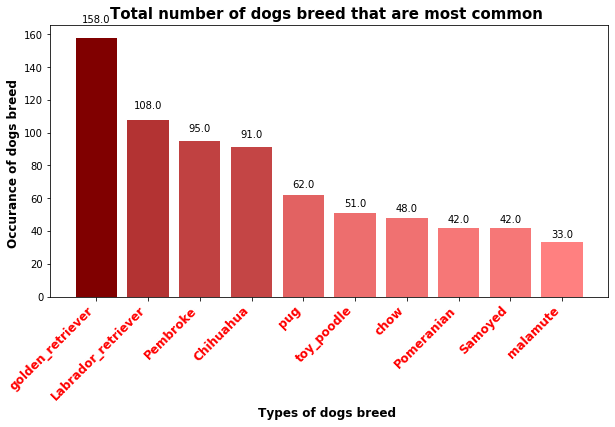

In [173]:
import matplotlib as mp

plt.figure(figsize=(10,5))
height = dog_breed_count.values
bars = dog_breed_count.index

#https://www.pythonprogramming.in/bar-chart-with-different-color-of-bars.html
# Colorize the graph based on likeability:
likeability_scores = np.array(height)
 
data_normalizer = mp.colors.Normalize()
color_map = mp.colors.LinearSegmentedColormap(
    "my_map",
    {
        "red": [(0, 1.0, 1.0),
                (1.0, .5, .5)],
        "green": [(0, 0.5, 0.5),
                  (1.0, 0, 0)],
        "blue": [(0, 0.50, 0.5),
                 (1.0, 0, 0)]
    }
)

y_pos = np.arange(len(bars))
rects1=plt.bar(y_pos, height, color=color_map(data_normalizer(likeability_scores)))
 
plt.xticks(y_pos, bars, color='red', rotation=45, fontweight='bold', fontsize='12', horizontalalignment='right')
plt.tick_params(labelbottom='off')

# Custom Axis title
plt.xlabel('Types of dogs breed ', fontweight='bold', color = 'black', fontsize='12', horizontalalignment='center')
plt.ylabel('Occurance of dogs breed ', fontweight='bold', color = 'black', fontsize='12', horizontalalignment='center')
plt.title('Total number of dogs breed that are most common ',fontweight='bold', color = 'black', fontsize='15', horizontalalignment='center')

def autolabel(rects):
    
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 1.05*height, float(height),ha='center', va='bottom')
autolabel(rects1)

Maximum number of dog breed is for golden retriever 


In [174]:
df_groupby_breed = df[['retweet_count','breed']].groupby('breed').sum()
df_groupby_breed =df_groupby_breed.sort_values("retweet_count", ascending = False).iloc[:10]

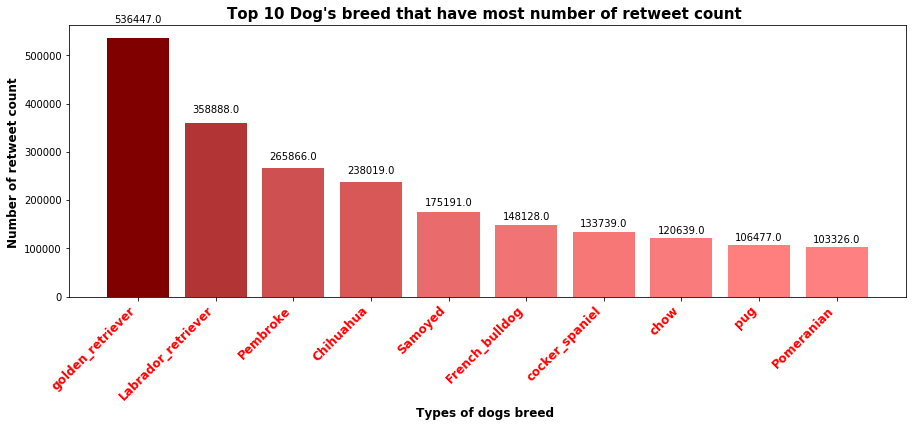

In [175]:
plt.figure(figsize=(15,5))
height = df_groupby_breed.retweet_count
bars = df_groupby_breed.index

likeability_scores = np.array(height)
 
data_normalizer = mp.colors.Normalize()
color_map = mp.colors.LinearSegmentedColormap(
    "my_map",
    {
        "red": [(0, 1.0, 1.0),
                (1.0, .5, .5)],
        "green": [(0, 0.5, 0.5),
                  (1.0, 0, 0)],
        "blue": [(0, 0.50, 0.5),
                 (1.0, 0, 0)]
    }
)

y_pos = np.arange(len(bars))
rects1=plt.bar(y_pos, height, color=color_map(data_normalizer(likeability_scores)))
 
plt.xticks(y_pos, bars, color='red', rotation=45, fontweight='bold', fontsize='12', horizontalalignment='right')
plt.tick_params(labelbottom='off')

# Custom Axis title
plt.xlabel('Types of dogs breed ', fontweight='bold', color = 'black', fontsize='12', horizontalalignment='center')
plt.ylabel('Number of retweet count ', fontweight='bold', color = 'black', fontsize='12', horizontalalignment='center')
plt.title("Top 10 Dog's breed that have most number of retweet count ",fontweight='bold', color = 'black', fontsize='15', horizontalalignment='center')


def autolabel(rects):
    
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 1.05*height, float(height),ha='center', va='bottom')
autolabel(rects1)

Maximum number of retweets counts is for golden retriever 


In [176]:
df.head()

,tweet_id,name,actual_rating,type,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,display_text_range,stage,breed
0,666020888022790149,None,0.8,floofer,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1.0,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,479.0,2477.0,"[0, 131]",NaN,Welsh_springer_spaniel
1,666029285002620928,a,0.7,floofer,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1.0,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,45.0,123.0,"[0, 139]",NaN,redbone
2,666033412701032449,a,0.9,floofer,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1.0,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,43.0,119.0,"[0, 130]",NaN,German_shepherd
3,666044226329800704,a,0.6,floofer,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1.0,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,135.0,280.0,"[0, 137]",NaN,Rhodesian_ridgeback
4,666049248165822465,None,0.5,floofer,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1.0,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,41.0,101.0,"[0, 120]",NaN,miniature_pinscher


In [177]:
df_groupby_breed_fav_count = df[['favorite_count','breed']].groupby('breed').sum()
df_groupby_breed_fav_count =df_groupby_breed_fav_count.sort_values("favorite_count", ascending = False).iloc[:10]

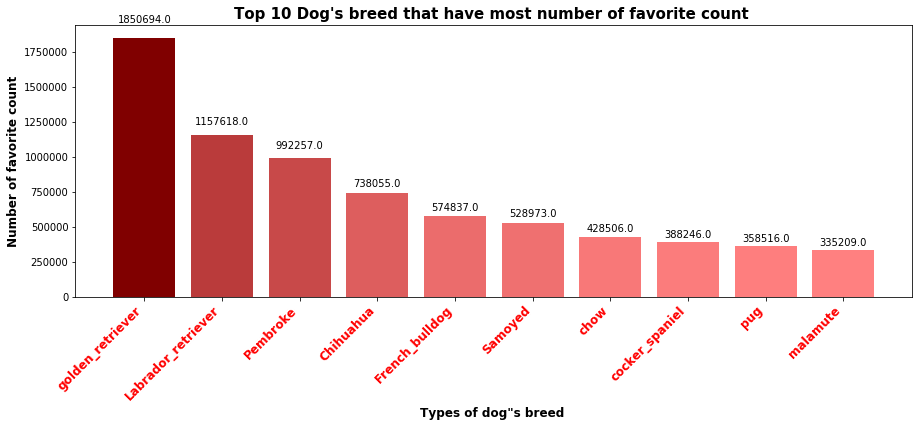

In [178]:
plt.figure(figsize=(15,5))
height = df_groupby_breed_fav_count.favorite_count
bars = df_groupby_breed_fav_count.index

likeability_scores = np.array(height)
 
data_normalizer = mp.colors.Normalize()
color_map = mp.colors.LinearSegmentedColormap(
    "my_map",
    {
        "red": [(0, 1.0, 1.0),
                (1.0, .5, .5)],
        "green": [(0, 0.5, 0.5),
                  (1.0, 0, 0)],
        "blue": [(0, 0.50, 0.5),
                 (1.0, 0, 0)]
    }
)

y_pos = np.arange(len(bars))
rects1=plt.bar(y_pos, height, color=color_map(data_normalizer(likeability_scores)))
 
plt.xticks(y_pos, bars, color='red', rotation=45, fontweight='bold', fontsize='12', horizontalalignment='right')
plt.tick_params(labelbottom='off')

# Custom Axis title
plt.xlabel('Types of dog"s breed ', fontweight='bold', color = 'black', fontsize='12', horizontalalignment='center')
plt.ylabel('Number of favorite count', fontweight='bold', color = 'black', fontsize='12', horizontalalignment='center')
plt.title("Top 10 Dog's breed that have most number of favorite count ",fontweight='bold', color = 'black', fontsize='15', horizontalalignment='center')


def autolabel(rects):
    
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 1.05*height, float(height),ha='center', va='bottom')
autolabel(rects1)

Maximum number of favourite  counts is for golden retriever 

## Conclusion

In this project of data wrangling we have started from a messy data and end up concluding the analysis.

Process involve in this projects are:

1) Cleaning of  dataset which involve first twitter data that contains information about twitter users second twitter Api third Algorithm implemanted on dogs data's result.

2) After cleaning we analyzes the data set and combined it .

3) After analysing we conlcuded our finding via graphs

## Results

1)Maximun dogs are claasifed in pupper and minimun are in floofer . Total of 16.69% of dogs are classifed others are not .

2)From the above analysis we can say that the most used words are pupper pup meet ect.

3)Many ratings are not clear and few tweets are done from two accounts 

4)From graph I can conclude that the most number of rating is 12 and the other ratings from 420 to 204 on x axis are singly rated . @dog_rates tweet more actively 

5)From the above analysis we can say that the most used words are pupper pup meet ect.

6)Maximum number of retweets counts is for golden retriever .

7)Maximum number of dog breed is for golden retriever .

8)Most number of are rated 1.2 and 1.1 as we can see from the graph 
